# DATA620 Project 1: Centrality Measures

## Alain T. Kuiete

## Importing Libraries

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Loading the Dataset

In [20]:
students = pd.read_csv('https://raw.githubusercontent.com/AlainKuiete/DATA620ASSIGNMENTS/master/out.moreno_seventh_seventh',
                       sep=' ', header=None, names=['stud1', 'stud2', 'wght'])

In [21]:
students.head()

,stud1,stud2,wght
0,%,asym,posweighted
1,%,376,29
2,1,2,1
3,1,3,1
4,1,4,2


In [22]:
students = students.iloc[2:,:].reset_index(drop=True)

In [23]:
students.head()

,stud1,stud2,wght
0,1,2,1
1,1,3,1
2,1,4,2
3,1,5,2
4,1,6,3


In [26]:
g = nx.from_pandas_edgelist(students, 'stud1', 'stud2')

In [30]:
attributes = pd.read_csv('https://raw.githubusercontent.com/AlainKuiete/DATA620ASSIGNMENTS/master/ent.moreno_seventh_seventh.student.gender', 
                        header=None, names=['Gender'])

In [31]:
attributes.head()

,Gender
0,male
1,male
2,male
3,male
4,male


In [33]:
attr_dict = dict(zip(attributes.index+1, attributes.Gender))

In [34]:
nx.set_node_attributes(g,attr_dict, 'Gender' )

In [35]:
print(g.number_of_nodes())

29


In [36]:
print(g.number_of_edges())

250


## Degree Centrality

### Number of nodes that have more than m neighbors

#### Function that returns all nodes that have m neighbors

In [41]:
def nodes_nbrs(G,m):
    nodes = set()
    for n in G.nodes():
        if len(list(G.neighbors(n))) == m:
            nodes.add(n)
    return nodes

#### Distribution of nodes in term of the number of nieghbors

In [57]:
node_dist = [len(nodes_nbrs(g,m)) for m in range(0,29)]


In [58]:
print(node_dist)

[0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 0, 0, 0, 2, 1, 2, 5, 3, 5, 1, 1, 1, 0, 0, 0, 0, 2]


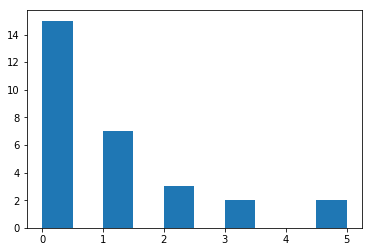

In [59]:
plt.hist(node_dist)
plt.show()

In [88]:
d = dict(list(nx.degree(g)))

In [90]:
d1 = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

In [95]:
d1

{'18': 7,
 '16': 8,
 '28': 8,
 '29': 8,
 '19': 9,
 '17': 11,
 '1': 15,
 '7': 15,
 '10': 16,
 '12': 17,
 '25': 17,
 '14': 18,
 '15': 18,
 '21': 18,
 '24': 18,
 '27': 18,
 '3': 19,
 '13': 19,
 '23': 19,
 '2': 20,
 '8': 20,
 '20': 20,
 '22': 20,
 '26': 20,
 '9': 21,
 '11': 22,
 '4': 23,
 '5': 28,
 '6': 28}